In [2]:
# Librerias y carga de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display



In [6]:
# Carga de datos
# Dataset de Clasificación
df_cls = pd.read_csv("data/wine_data_train_classification.csv")
print(f"Dataset Clasificación cargado: {df_cls.shape[0]} filas, {df_cls.shape[1]} columnas")

# Dataset de Regresión
df_reg = pd.read_csv("data/wine_data_train_regression.csv")
print(f"Dataset Regresión cargado: {df_reg.shape[0]} filas, {df_reg.shape[1]} columnas")

#información básica de los datasets
info_cls = pd.DataFrame({
    "Tipo de Dato": df_cls.dtypes,
    "Valores Nulos": df_cls.isnull().sum(),
    "Valores Únicos": df_cls.nunique(),
    "Valores No Nulos": df_cls.notnull().sum()
})

display(info_cls.style.background_gradient(cmap='Greens').set_caption("📋 Información General - Dataset Clasificación"))

info_reg = pd.DataFrame({
    "Tipo de Dato": df_reg.dtypes,
    "Valores Nulos": df_reg.isnull().sum(),
    "Valores Únicos": df_reg.nunique(),
    "Valores No Nulos": df_reg.notnull().sum()
})

display(info_reg.style.background_gradient(cmap='Oranges').set_caption("📋 Información General - Dataset Regresión"))




Dataset Clasificación cargado: 5847 filas, 14 columnas
Dataset Regresión cargado: 5847 filas, 13 columnas


,Tipo de Dato,Valores Nulos,Valores Únicos,Valores No Nulos
fixed acidity,float64,0,105,5847
volatile acidity,float64,0,184,5847
citric acid,float64,0,88,5847
residual sugar,float64,0,307,5847
chlorides,float64,0,207,5847
free sulfur dioxide,float64,0,132,5847
total sulfur dioxide,float64,0,275,5847
density,float64,0,973,5847
pH,float64,0,107,5847
sulphates,float64,0,109,5847


,Tipo de Dato,Valores Nulos,Valores Únicos,Valores No Nulos
fixed acidity,float64,0,104,5847
volatile acidity,float64,0,184,5847
citric acid,float64,0,89,5847
residual sugar,float64,0,313,5847
chlorides,float64,0,204,5847
free sulfur dioxide,float64,0,131,5847
total sulfur dioxide,float64,0,271,5847
density,float64,0,973,5847
pH,float64,0,107,5847
sulphates,float64,0,107,5847


In [7]:
print("\n=== NULOS Y DUPLICADOS ===")
print("Clasificación - Nulos:\n", df_cls.isnull().sum())
print("Regresión - Nulos:\n", df_reg.isnull().sum())
print(f"Duplicados Clasificación: {df_cls.duplicated().sum()}")
print(f"Duplicados Regresión: {df_reg.duplicated().sum()}")



=== NULOS Y DUPLICADOS ===
Clasificación - Nulos:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
quality_category        0
quality_label           0
dtype: int64
Regresión - Nulos:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
quality                 0
dtype: int64
Duplicados Clasificación: 970
Duplicados Regresión: 969



Descripción estadística del dataset de Clasificación:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5847.000000       5847.000000  5847.000000     5847.000000   
mean        7.218616          0.339803     0.318659        5.465401   
std         1.299384          0.164542     0.144632        4.764590   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.200000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5847.000000          5847.000000           5847.000000  5847.000000   
mean      0.056071            30.671969            116.291859     0.994704   
std       0.035622            17.872105             56.506500     0.003

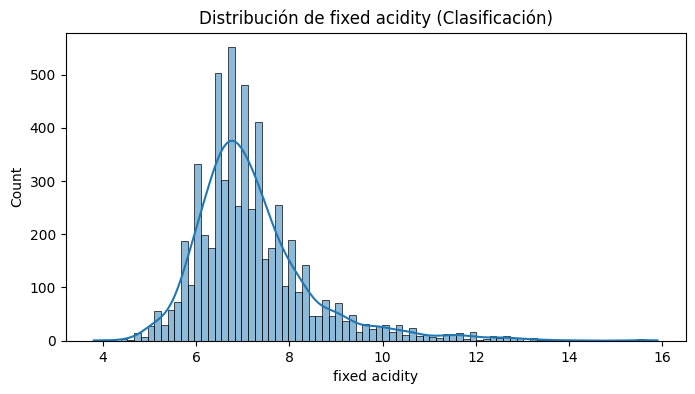

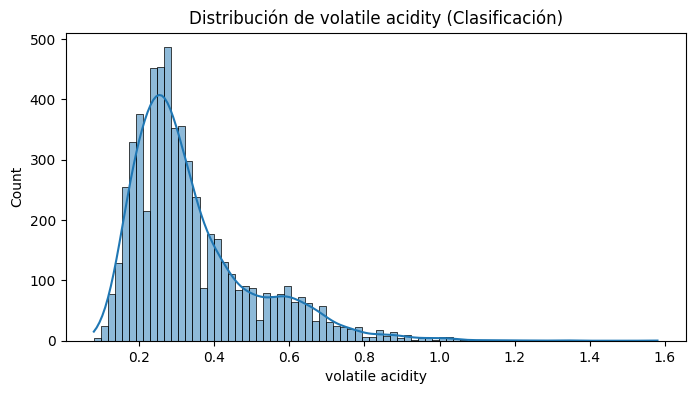

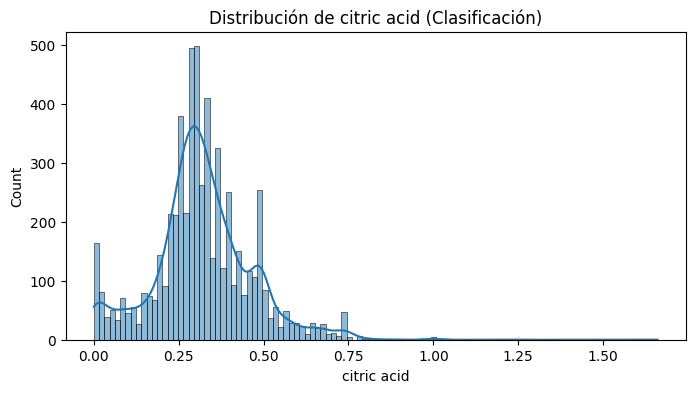

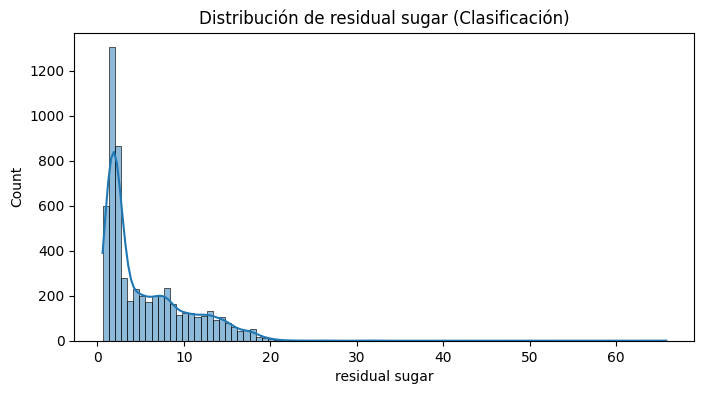

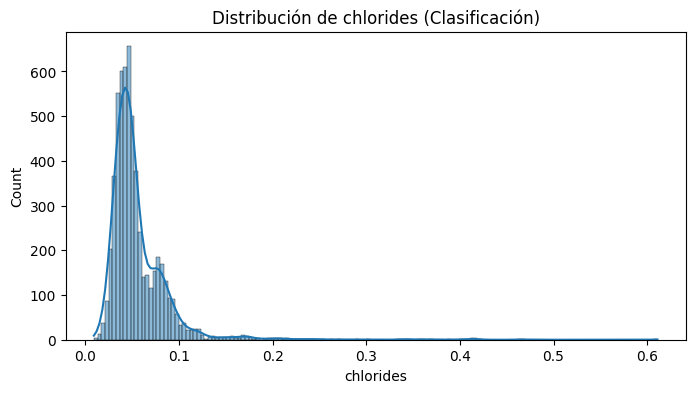

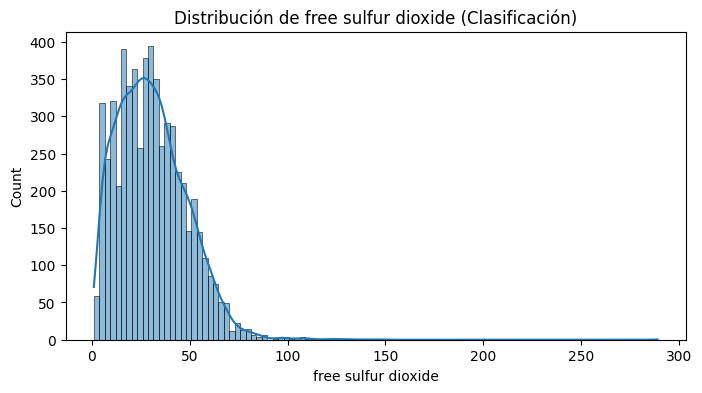

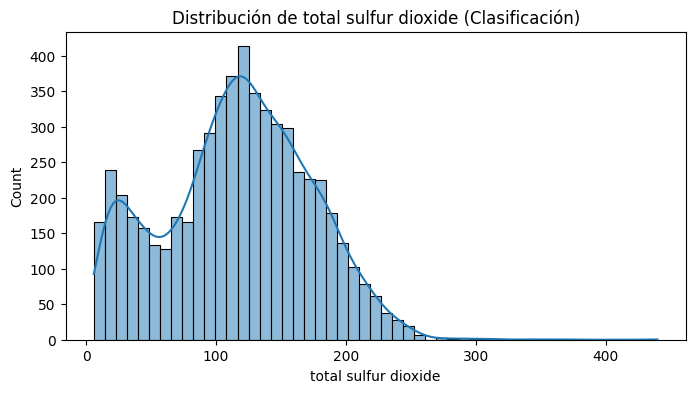

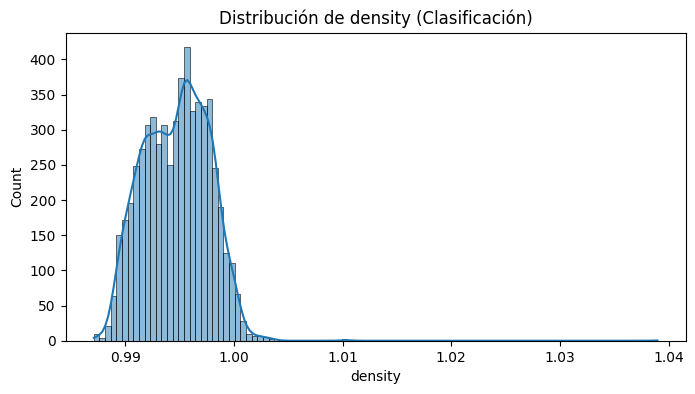

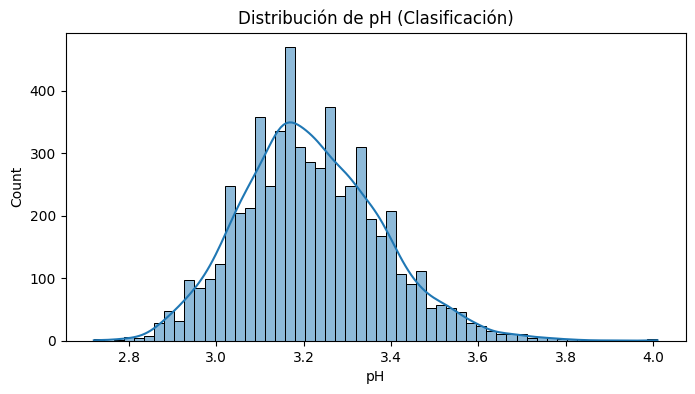

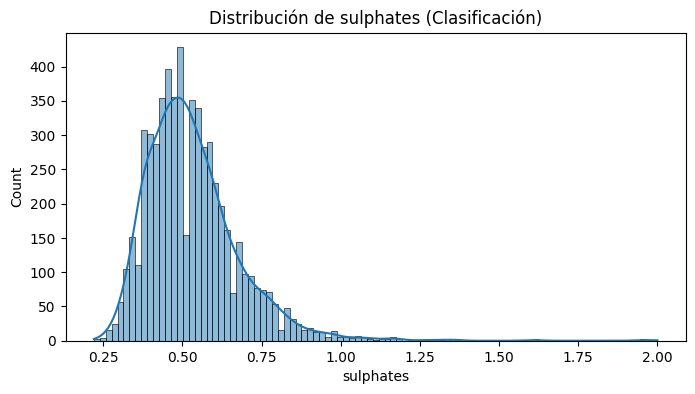

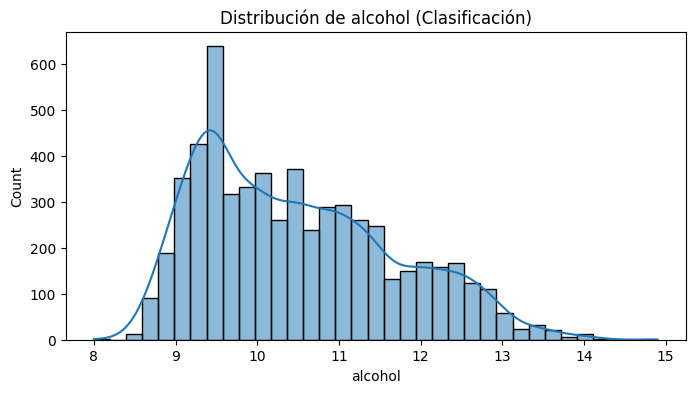

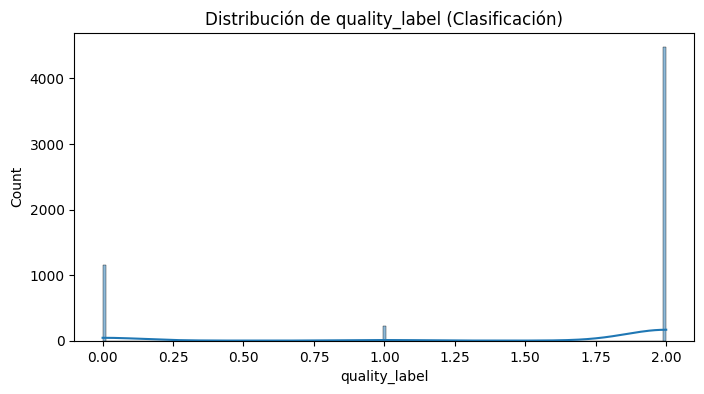

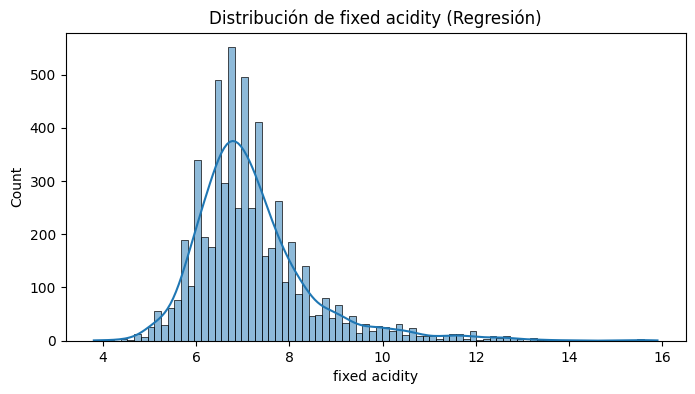

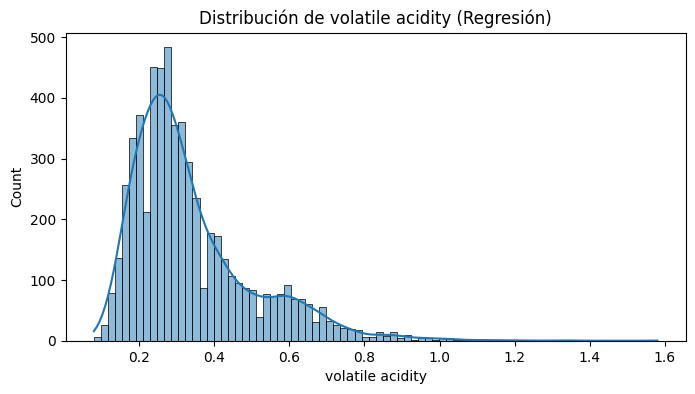

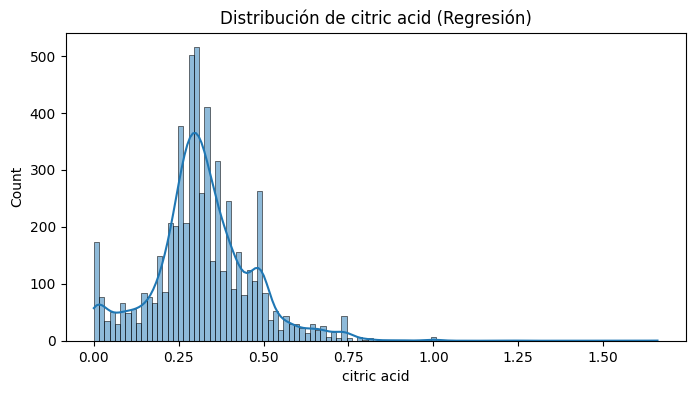

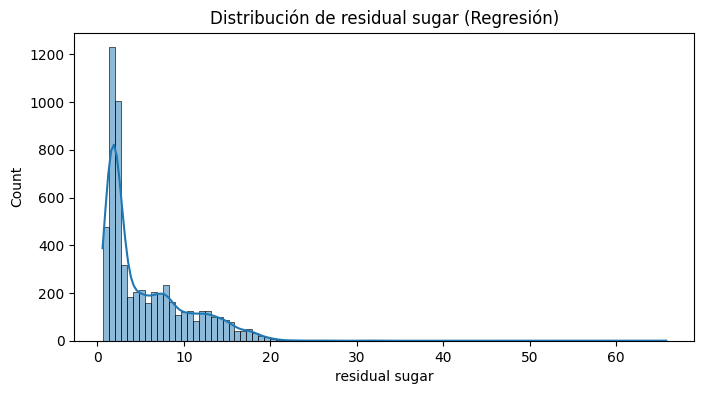

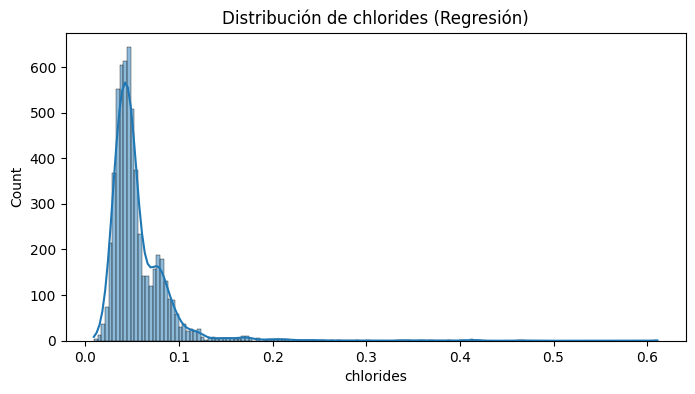

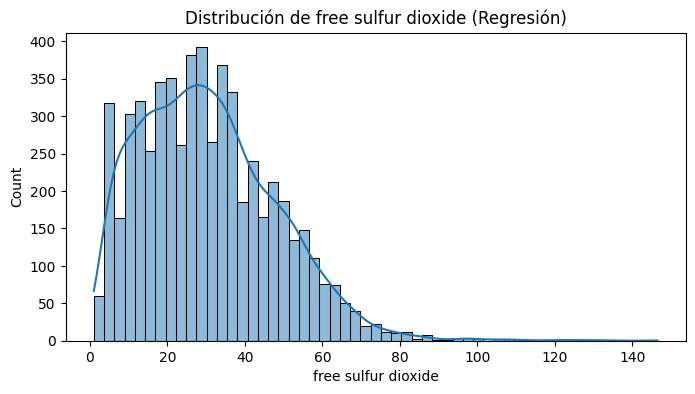

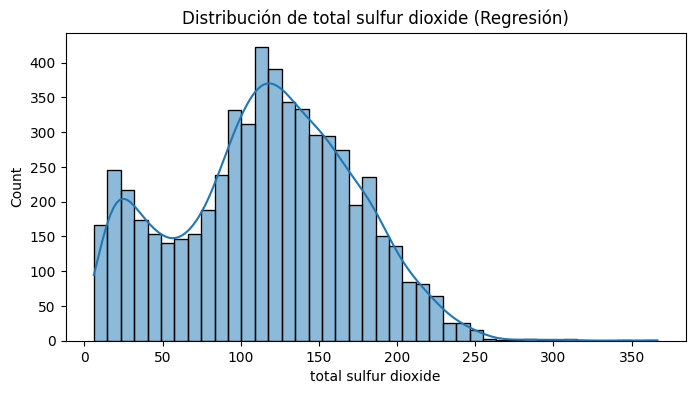

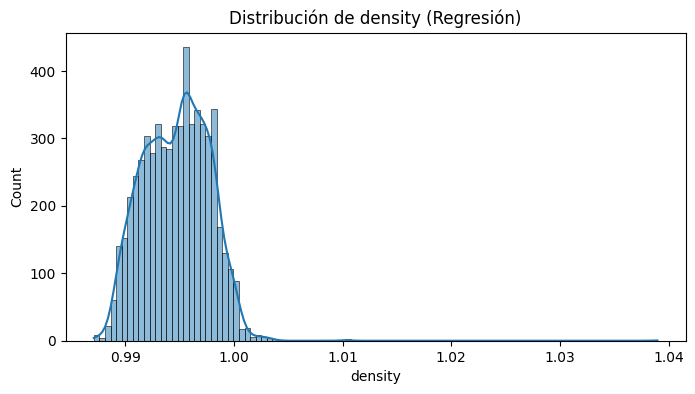

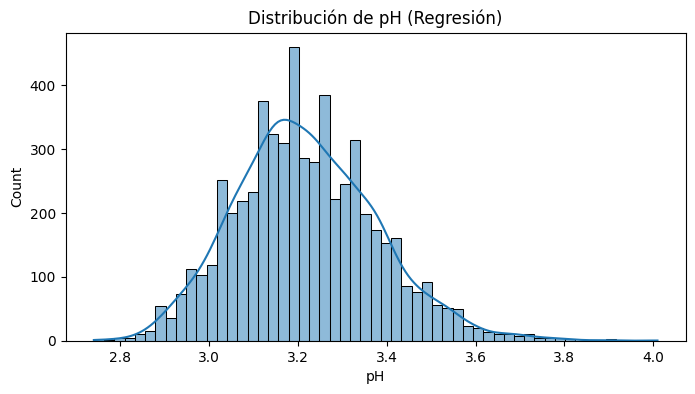

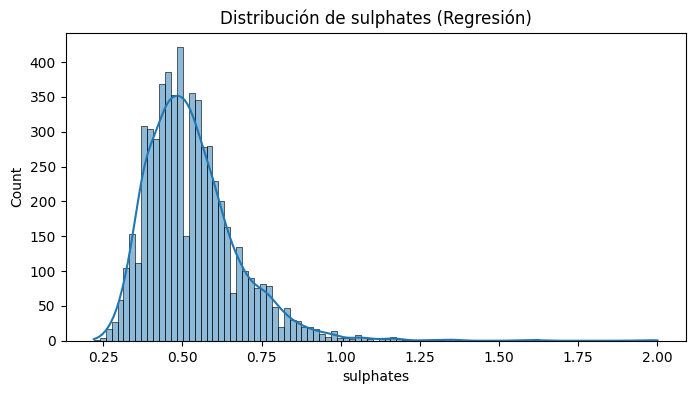

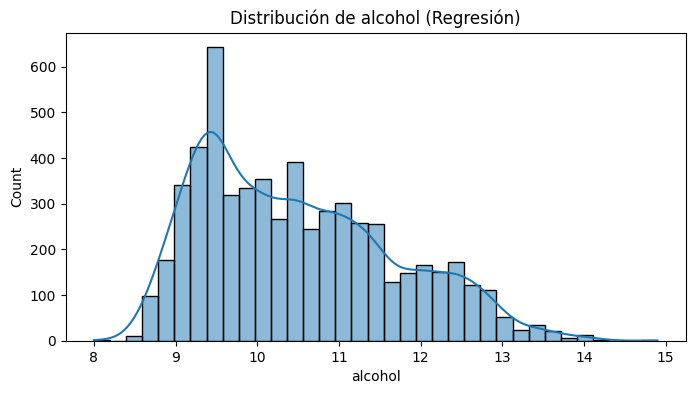

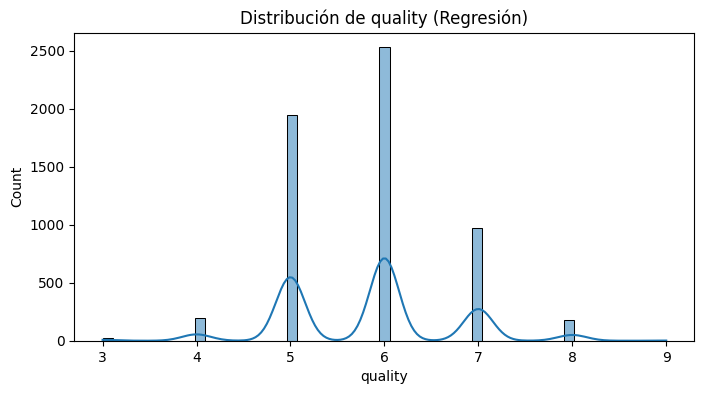

In [9]:

# Análisis estadístico descriptivo
print("\nDescripción estadística del dataset de Clasificación:")
print(df_cls.describe())    
print("\nDescripción estadística del dataset de Regresión:")
print(df_reg.describe())  

# Visualización de datos

# Identificación de outliers
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    out = df[(df[columna] < Q1 - 1.5*IQR) | (df[columna] > Q3 + 1.5*IQR)]
    return out.shape[0]

print("\n=== OUTLIERS DETECTADOS (Clasificación) ===")
for c in df_cls.select_dtypes(include=[np.number]).columns:
    print(f"{c}: {detectar_outliers(df_cls, c)}")
    print("\n=== OUTLIERS DETECTADOS (Regresión) ===")
for c in df_reg.select_dtypes(include=[np.number]).columns:
    print(f"{c}: {detectar_outliers(df_reg, c)}")

# Visualización de distribuciones de variables numéricas
num_cols_cls = df_cls.select_dtypes(include=[np.number]).columns
num_cols_reg = df_reg.select_dtypes(include=[np.number]).columns
for col in num_cols_cls:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_cls[col], kde=True)
    plt.title(f'Distribución de {col} (Clasificación)')
    plt.show()
for col in num_cols_reg:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_reg[col], kde=True)
    plt.title(f'Distribución de {col} (Regresión)')
    plt.show()



=== OUTLIERS DETECTADOS (Clasificación) ===
fixed acidity: 321

=== OUTLIERS DETECTADOS (Regresión) ===
volatile acidity: 339

=== OUTLIERS DETECTADOS (Regresión) ===
citric acid: 448

=== OUTLIERS DETECTADOS (Regresión) ===
residual sugar: 94

=== OUTLIERS DETECTADOS (Regresión) ===
chlorides: 282

=== OUTLIERS DETECTADOS (Regresión) ===
free sulfur dioxide: 48

=== OUTLIERS DETECTADOS (Regresión) ===
total sulfur dioxide: 12

=== OUTLIERS DETECTADOS (Regresión) ===
density: 3

=== OUTLIERS DETECTADOS (Regresión) ===
pH: 63

=== OUTLIERS DETECTADOS (Regresión) ===
sulphates: 166

=== OUTLIERS DETECTADOS (Regresión) ===
alcohol: 3

=== OUTLIERS DETECTADOS (Regresión) ===
quality_label: 1371

=== OUTLIERS DETECTADOS (Regresión) ===
fixed acidity: 314
volatile acidity: 326
citric acid: 460
residual sugar: 110
chlorides: 259
free sulfur dioxide: 55
total sulfur dioxide: 9
density: 3
pH: 66
sulphates: 167
alcohol: 3
quality: 208


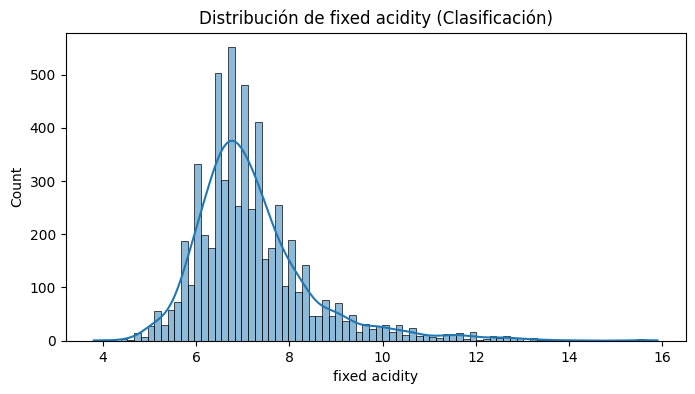

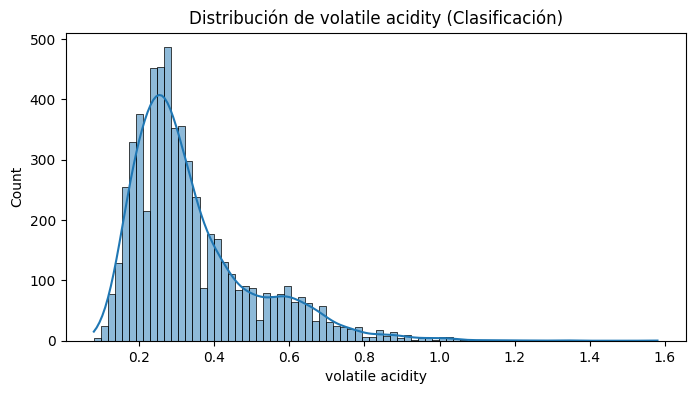

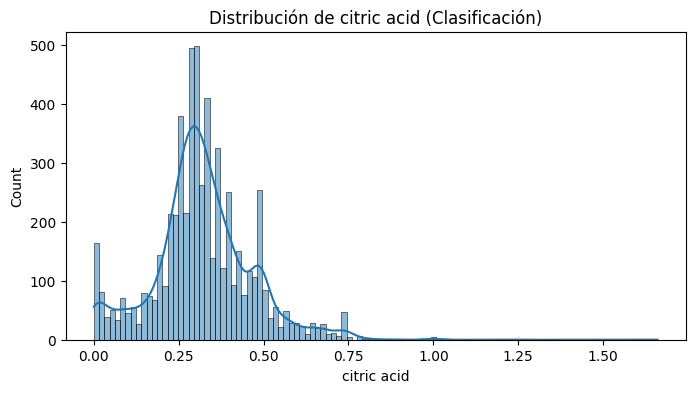

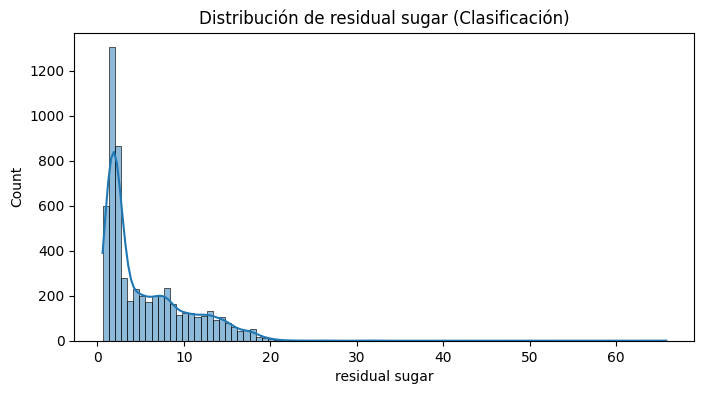

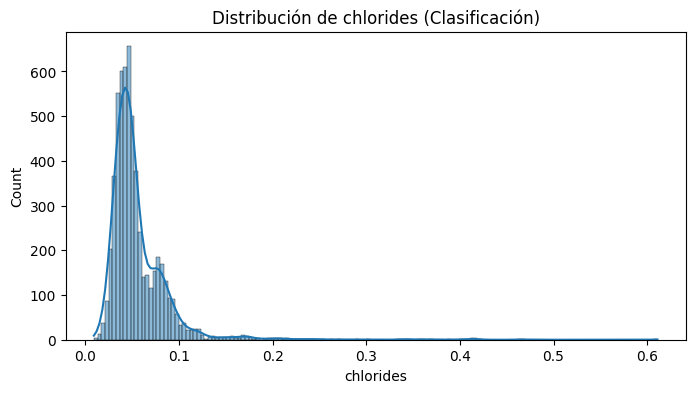

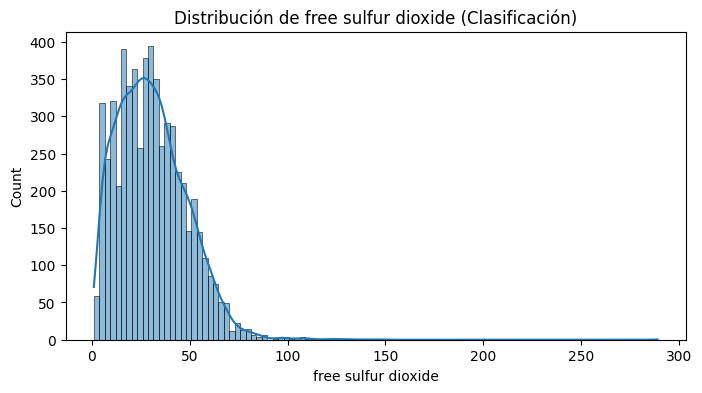

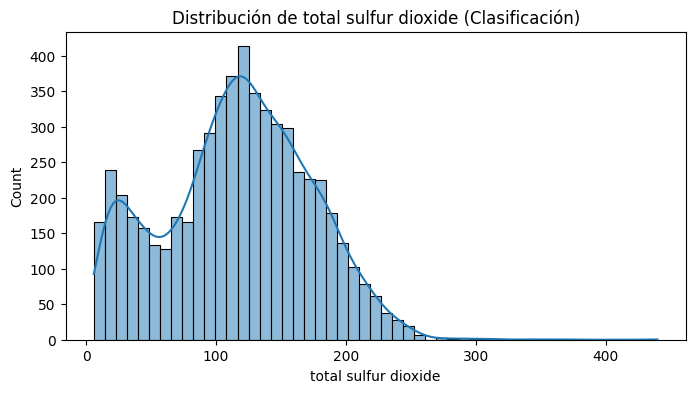

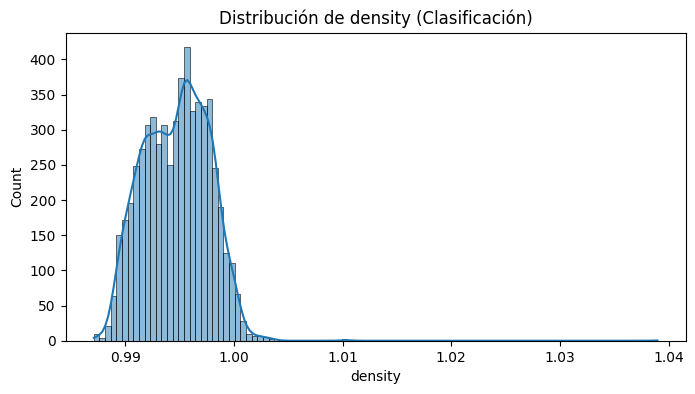

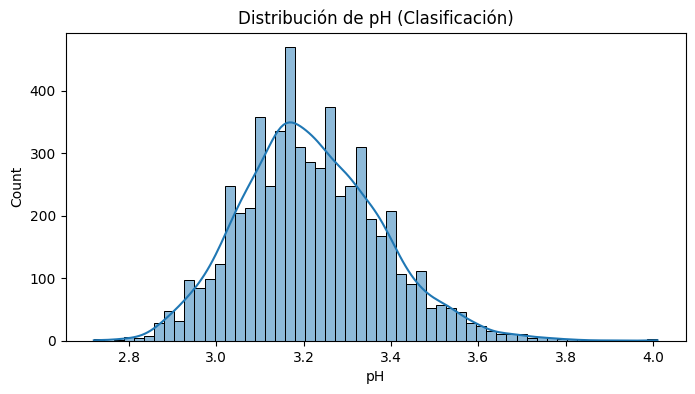

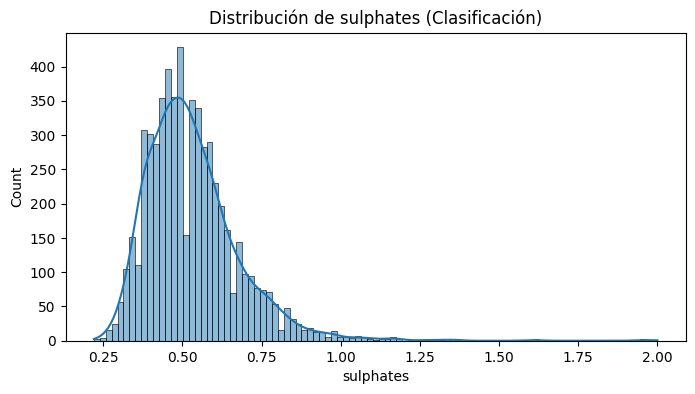

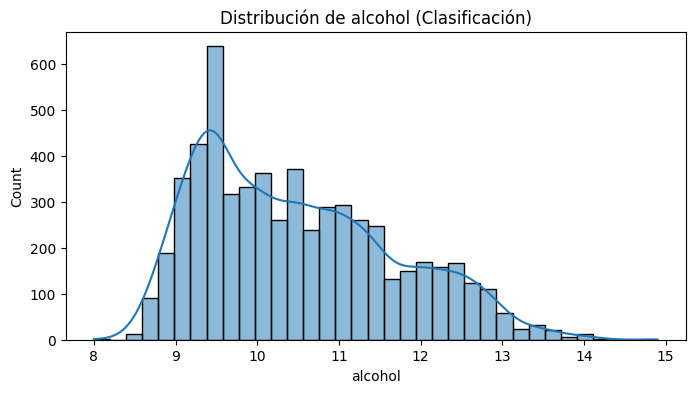

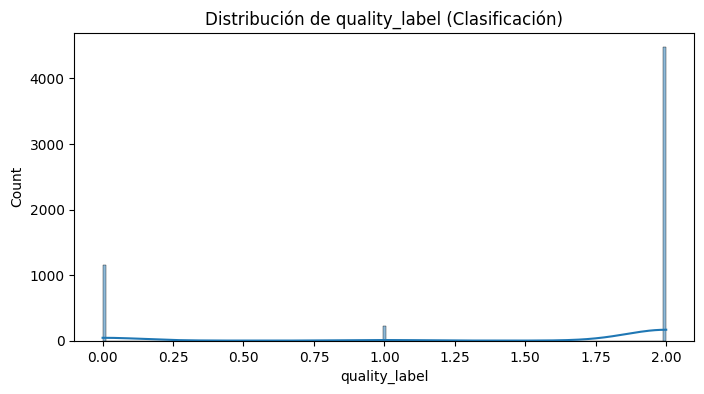

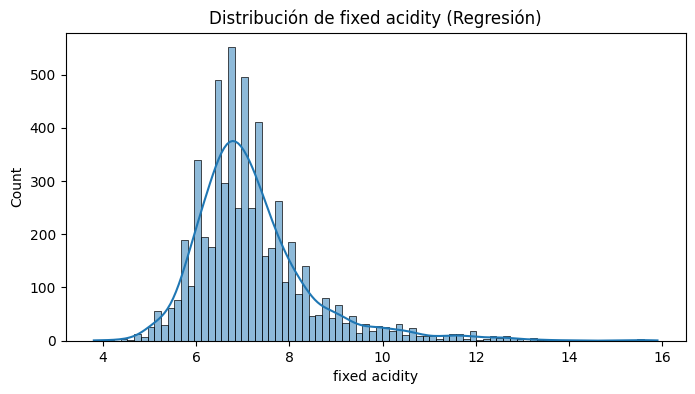

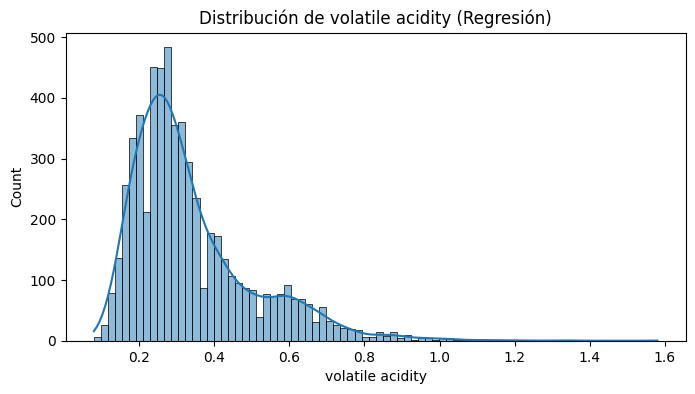

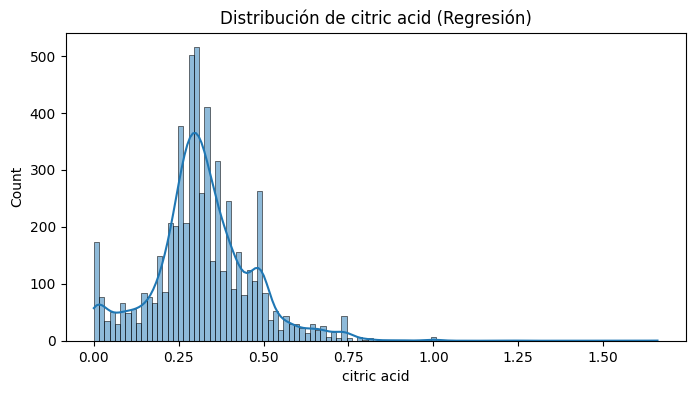

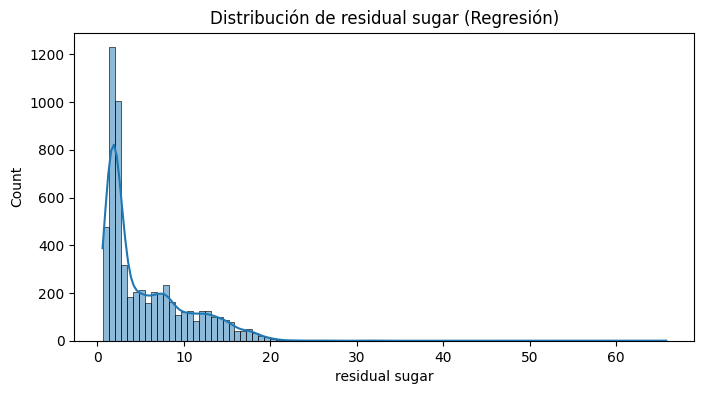

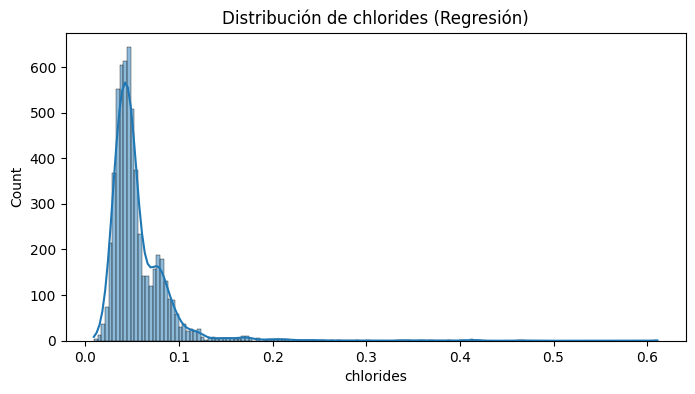

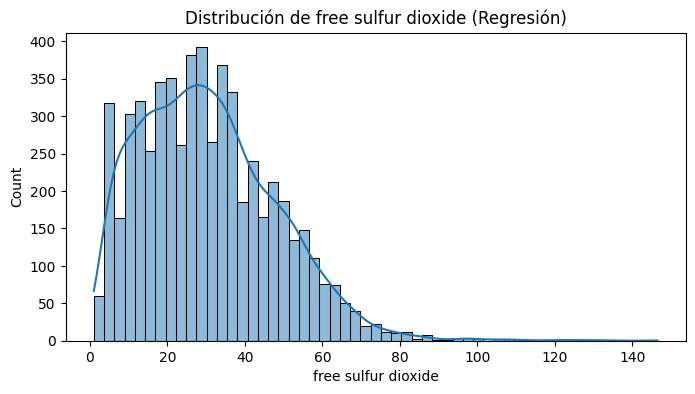

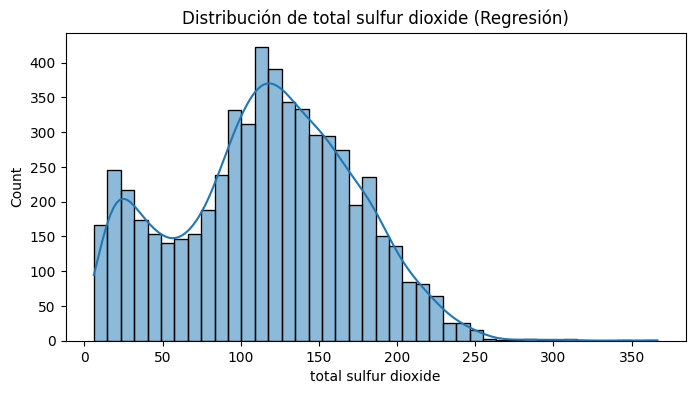

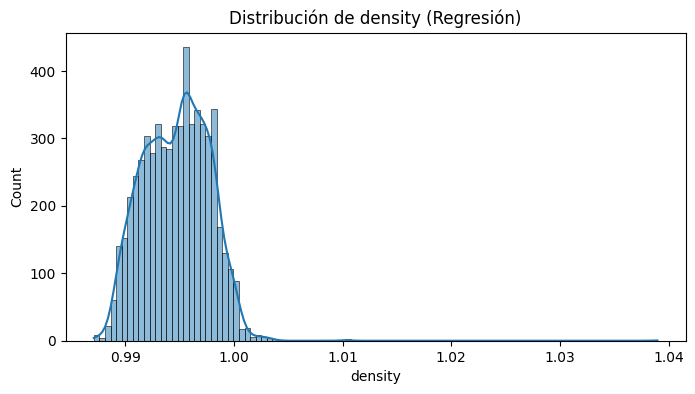

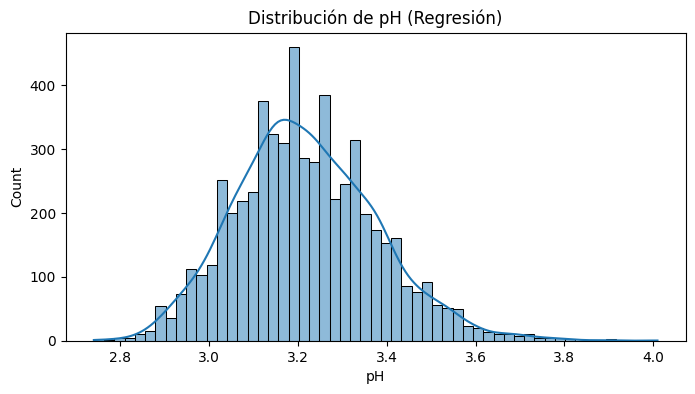

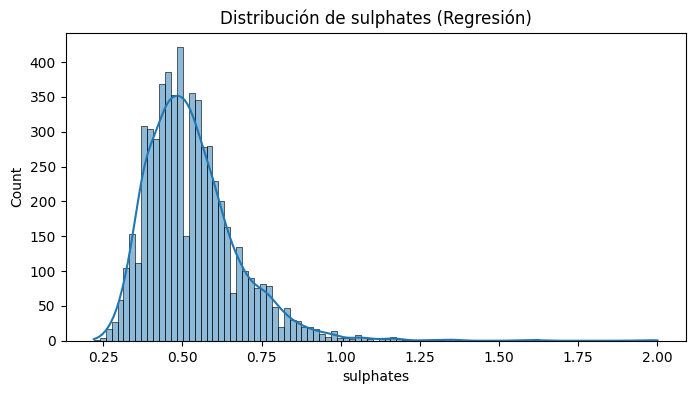

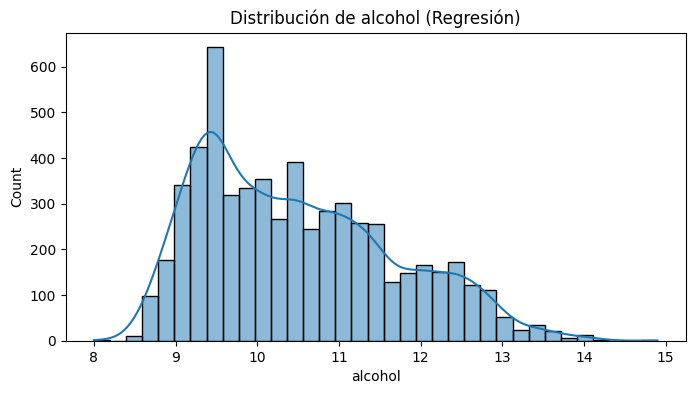

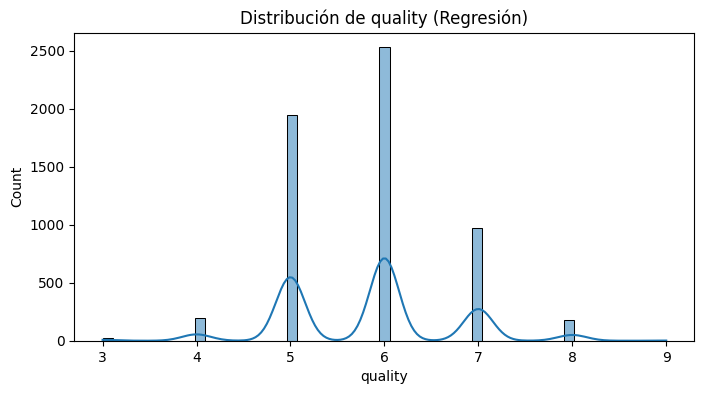

In [10]:

# Visualización de datos

# Identificación de outliers
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    out = df[(df[columna] < Q1 - 1.5*IQR) | (df[columna] > Q3 + 1.5*IQR)]
    return out.shape[0]

print("\n=== OUTLIERS DETECTADOS (Clasificación) ===")
for c in df_cls.select_dtypes(include=[np.number]).columns:
    print(f"{c}: {detectar_outliers(df_cls, c)}")
    print("\n=== OUTLIERS DETECTADOS (Regresión) ===")
for c in df_reg.select_dtypes(include=[np.number]).columns:
    print(f"{c}: {detectar_outliers(df_reg, c)}")

# Visualización de distribuciones de variables numéricas
num_cols_cls = df_cls.select_dtypes(include=[np.number]).columns
num_cols_reg = df_reg.select_dtypes(include=[np.number]).columns
for col in num_cols_cls:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_cls[col], kde=True)
    plt.title(f'Distribución de {col} (Clasificación)')
    plt.show()
for col in num_cols_reg:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_reg[col], kde=True)
    plt.title(f'Distribución de {col} (Regresión)')
    plt.show()





=== CORRELACION ENTRE VARIABLES ===

=== MATRIZ DE CORRELACIÓN (Clasificación) ===
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.221922     0.328988   
volatile acidity           0.221922          1.000000    -0.374766   
citric acid                0.328988         -0.374766     1.000000   
residual sugar            -0.112904         -0.191301     0.138369   
chlorides                  0.296657          0.376555     0.046942   
free sulfur dioxide       -0.281741         -0.356843     0.131695   
total sulfur dioxide      -0.325779         -0.415141     0.191276   
density                    0.456728          0.272567     0.101174   
pH                        -0.257963          0.258206    -0.330696   
sulphates                  0.294534          0.226561     0.063811   
alcohol                   -0.095595         -0.039683    -0.013491   
quality_label              0.045741          0.112270    -0.037997   

     

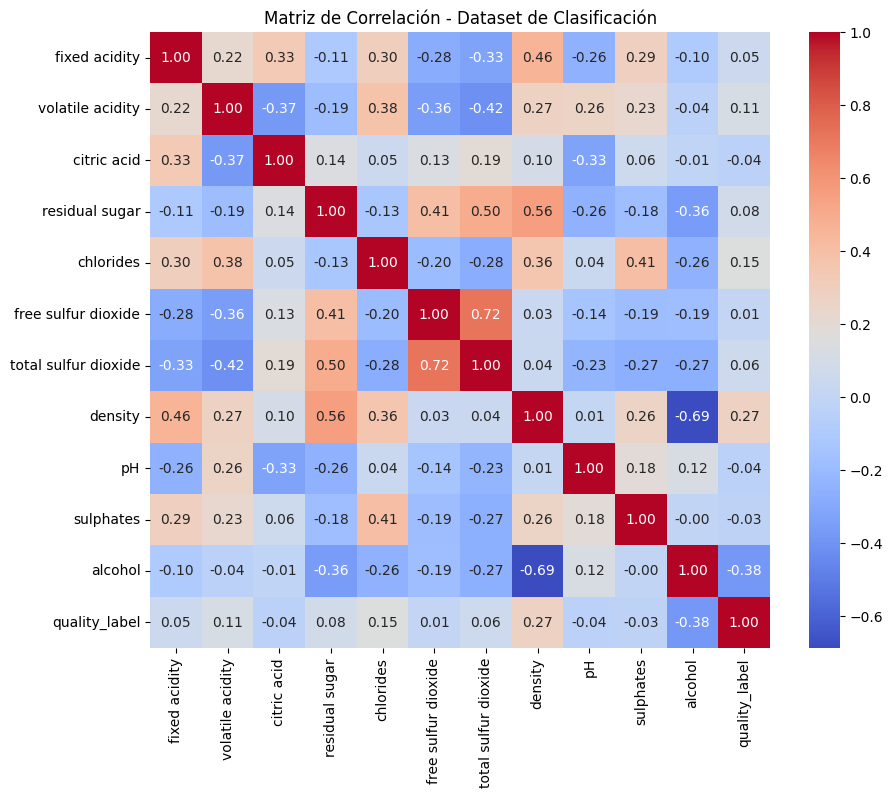

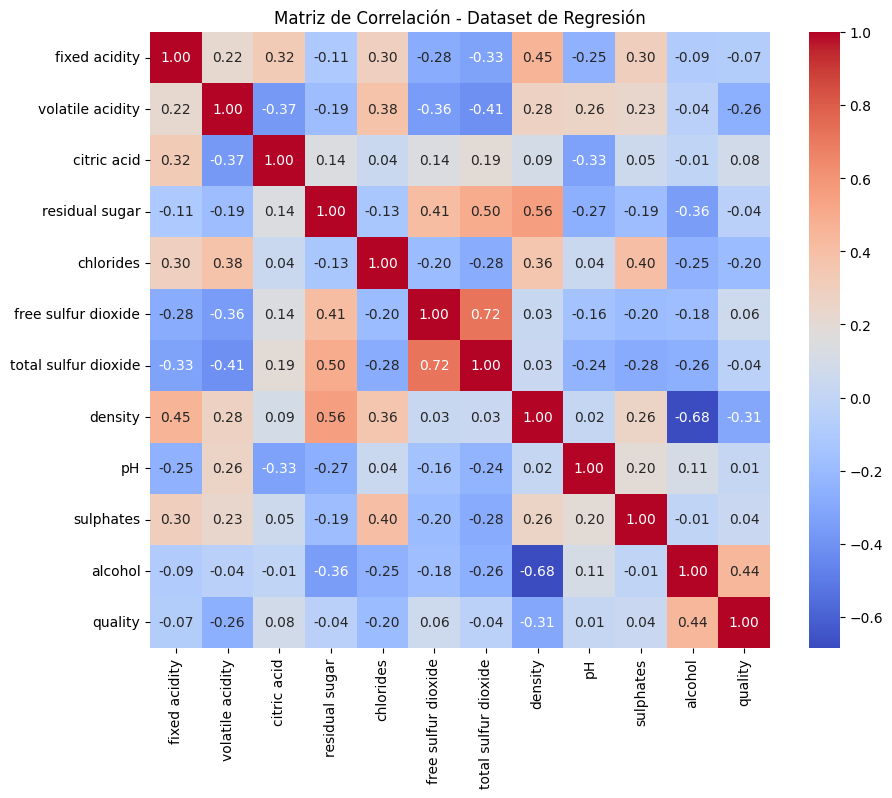


=== CORRELACIONES FUERTES (Clasificación) ===
total sulfur dioxide  free sulfur dioxide     0.722698
free sulfur dioxide   total sulfur dioxide    0.722698
residual sugar        density                 0.556492
density               residual sugar          0.556492
                      alcohol                -0.687549
alcohol               density                -0.687549
dtype: float64

=== CORRELACIONES FUERTES (Regresión) ===
total sulfur dioxide  free sulfur dioxide     0.722499
free sulfur dioxide   total sulfur dioxide    0.722499
residual sugar        density                 0.556590
density               residual sugar          0.556590
                      alcohol                -0.684575
alcohol               density                -0.684575
dtype: float64


In [12]:
# Correlación entre variables
print("\n=== CORRELACION ENTRE VARIABLES ===")

print("\n=== MATRIZ DE CORRELACIÓN (Clasificación) ===")
corr_cls = df_cls.corr(numeric_only=True)
print(corr_cls)

print("\n=== MATRIZ DE CORRELACIÓN (Regresión) ===")
corr_reg = df_reg.corr(numeric_only=True)
print(corr_reg)

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_cls, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación - Dataset de Clasificación')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_reg, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación - Dataset de Regresión')
plt.show()

# Identificar correlaciones más fuertes (positivas y negativas)
print("\n=== CORRELACIONES FUERTES (Clasificación) ===")
corr_pairs_cls = corr_cls.unstack().sort_values(ascending=False)
print(corr_pairs_cls[(corr_pairs_cls < 1) & (abs(corr_pairs_cls) > 0.5)])

print("\n=== CORRELACIONES FUERTES (Regresión) ===")
corr_pairs_reg = corr_reg.unstack().sort_values(ascending=False)
print(corr_pairs_reg[(corr_pairs_reg < 1) & (abs(corr_pairs_reg) > 0.5)])


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

print("\n=== PREPARACIÓN DE DATOS PARA MODELADO ===")

# Copias de los datasets originales
data_cls = df_cls.copy()
data_reg = df_reg.copy()

# --- 1. Eliminación de duplicados y valores nulos ---
data_cls.drop_duplicates(inplace=True)
data_reg.drop_duplicates(inplace=True)
data_cls.dropna(inplace=True)
data_reg.dropna(inplace=True)

print(f"Dataset Clasificación limpio: {data_cls.shape[0]} filas, {data_cls.shape[1]} columnas")
print(f"Dataset Regresión limpio: {data_reg.shape[0]} filas, {data_reg.shape[1]} columnas")

# --- 2. Separar variables predictoras (X) y objetivo (y) ---
# Ajusta el nombre de la columna objetivo según tu dataset (por ejemplo 'quality' o 'target')
target_cls = 'quality_label'  # 
target_reg = 'quality'  # 

X_cls = data_cls.drop(columns=[target_cls])
y_cls = data_cls[target_cls]

X_reg = data_reg.drop(columns=[target_reg])
y_reg = data_reg[target_reg]

# --- 3. Codificación de variables categóricas (si existen) ---
cat_cols_cls = X_cls.select_dtypes(include=['object']).columns
cat_cols_reg = X_reg.select_dtypes(include=['object']).columns

if len(cat_cols_cls) > 0:
    print(f"Codificando variables categóricas (Clasificación): {list(cat_cols_cls)}")
    X_cls = pd.get_dummies(X_cls, columns=cat_cols_cls, drop_first=True)

if len(cat_cols_reg) > 0:
    print(f"Codificando variables categóricas (Regresión): {list(cat_cols_reg)}")
    X_reg = pd.get_dummies(X_reg, columns=cat_cols_reg, drop_first=True)

# --- 4. Escalado de variables numéricas ---
scaler = StandardScaler()

X_cls_scaled = scaler.fit_transform(X_cls)
X_reg_scaled = scaler.fit_transform(X_reg)

print("Variables numéricas escaladas correctamente.")

# --- 5. División en entrenamiento y prueba ---
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls_scaled, y_cls, test_size=0.3, random_state=42, stratify=y_cls)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_scaled, y_reg, test_size=0.3, random_state=42)

print("Conjuntos de entrenamiento y prueba creados exitosamente.")
print(f"Clasificación -> Entrenamiento: {X_train_cls.shape}, Prueba: {X_test_cls.shape}")
print(f"Regresión -> Entrenamiento: {X_train_reg.shape}, Prueba: {X_test_reg.shape}")


=== PREPARACIÓN DE DATOS PARA MODELADO ===
Dataset Clasificación limpio: 4877 filas, 14 columnas
Dataset Regresión limpio: 4878 filas, 13 columnas
Codificando variables categóricas (Clasificación): ['type', 'quality_category']
Codificando variables categóricas (Regresión): ['type']
Variables numéricas escaladas correctamente.
Conjuntos de entrenamiento y prueba creados exitosamente.
Clasificación -> Entrenamiento: (3413, 14), Prueba: (1464, 14)
Regresión -> Entrenamiento: (3414, 12), Prueba: (1464, 12)



=== ANÁLISIS MULTIVARIADO ===


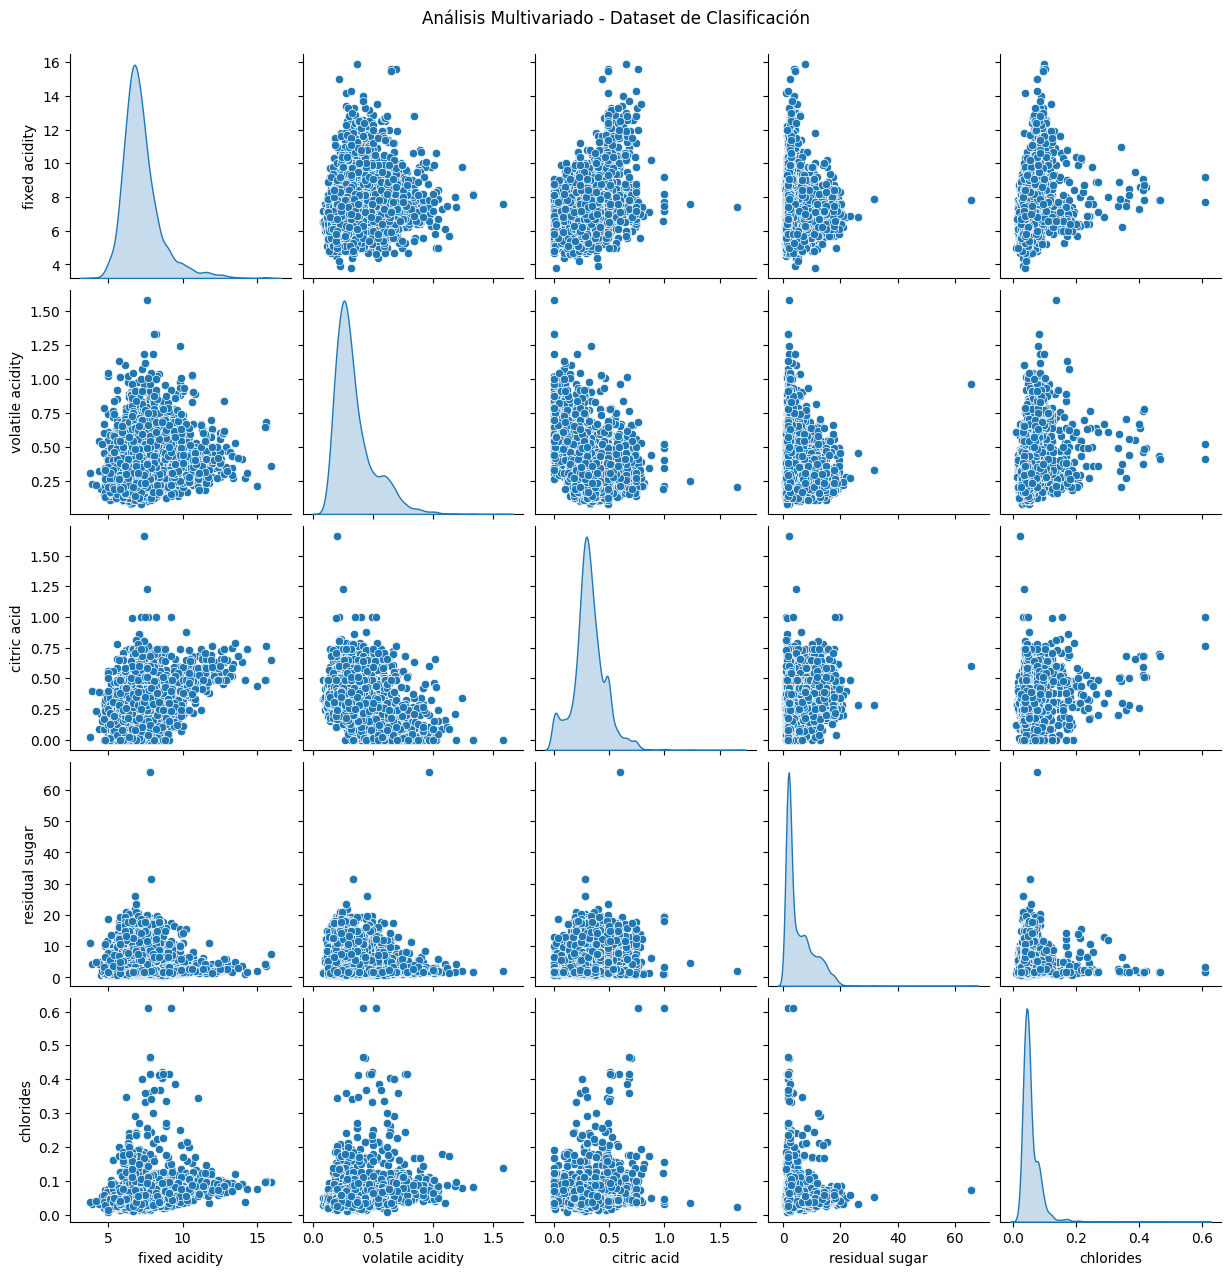

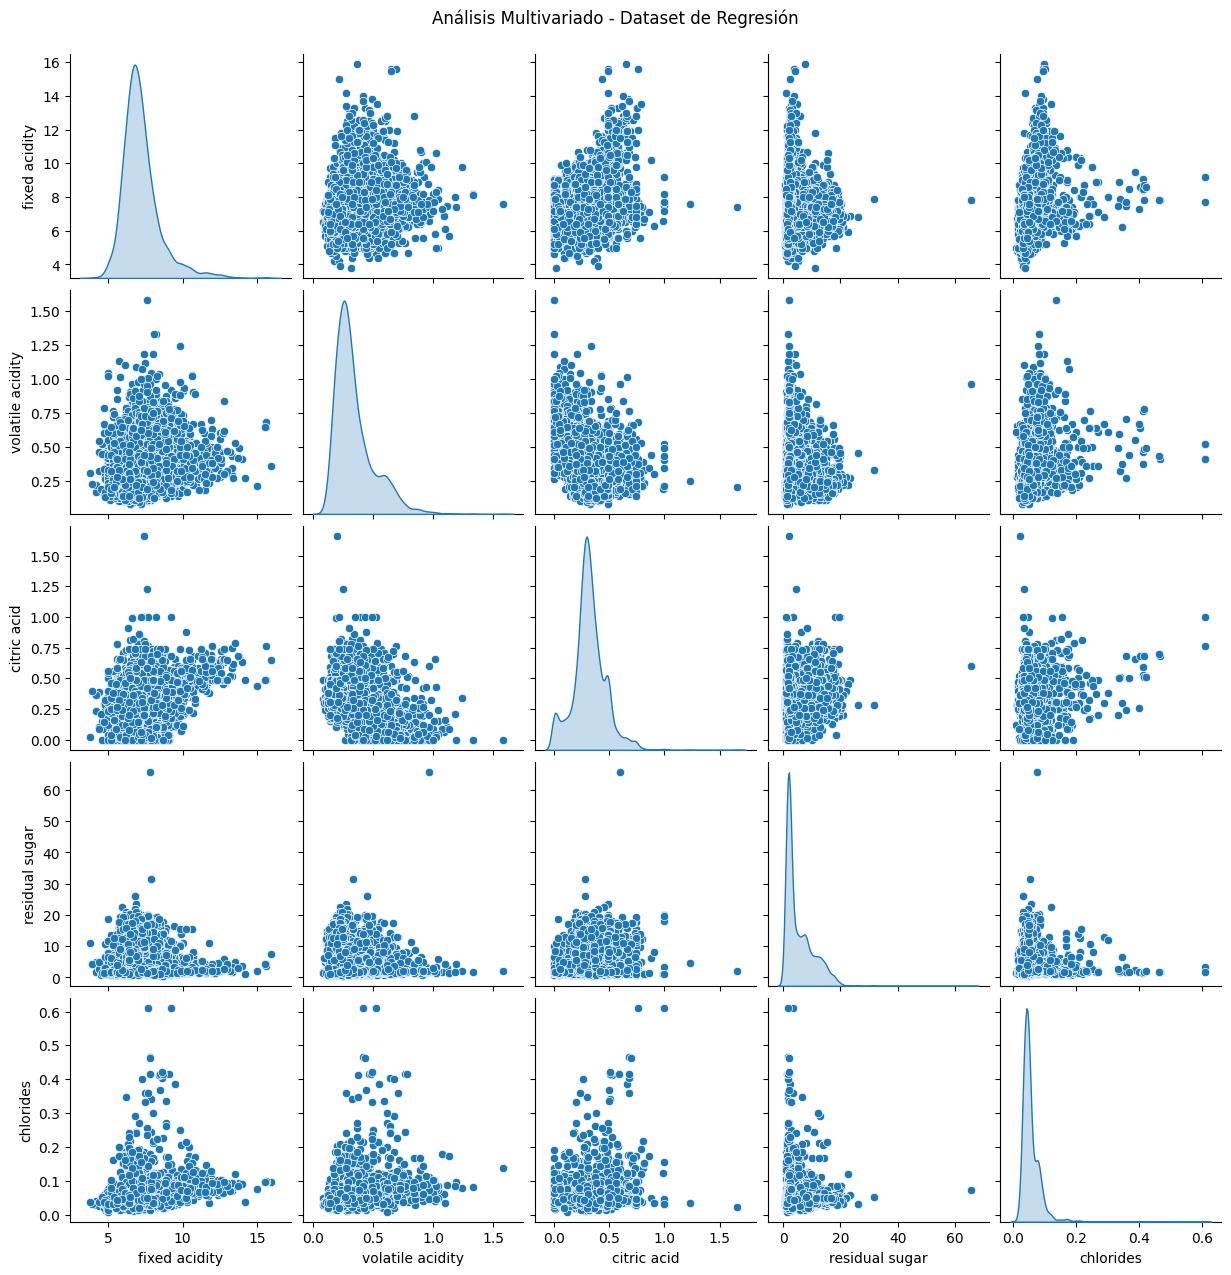

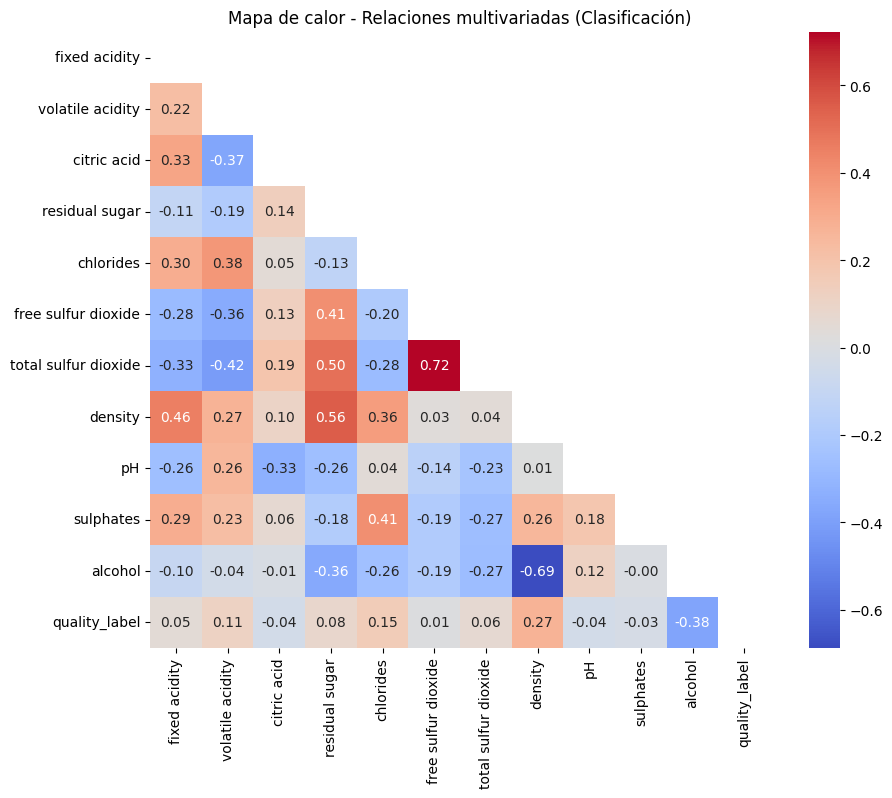

In [14]:
print("\n=== ANÁLISIS MULTIVARIADO ===")

# --- 1. Pares de variables numéricas más relevantes ---
# Muestra cómo se relacionan las variables entre sí y con la variable objetivo
num_cols_cls = df_cls.select_dtypes(include=[np.number]).columns.tolist()
num_cols_reg = df_reg.select_dtypes(include=[np.number]).columns.tolist()

# Limitar el número de columnas para evitar gráficos muy cargados
cols_to_plot_cls = num_cols_cls[:5] + ['target'] if 'target' in df_cls.columns else num_cols_cls[:5]
cols_to_plot_reg = num_cols_reg[:5] + ['target'] if 'target' in df_reg.columns else num_cols_reg[:5]

# Pairplot (gráficos de dispersión por pares)
sns.pairplot(df_cls[cols_to_plot_cls], diag_kind='kde')
plt.suptitle("Análisis Multivariado - Dataset de Clasificación", y=1.02)
plt.show()

sns.pairplot(df_reg[cols_to_plot_reg], diag_kind='kde')
plt.suptitle("Análisis Multivariado - Dataset de Regresión", y=1.02)
plt.show()

# --- 2. Relación entre la variable objetivo y algunas características ---
if 'target' in df_cls.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='target', y=df_cls.columns[0], data=df_cls)
    plt.title(f'Relación entre {df_cls.columns[0]} y la variable objetivo (Clasificación)')
    plt.show()

if 'target' in df_reg.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='target', y=df_reg.columns[0], data=df_reg)
    plt.title(f'Relación entre {df_reg.columns[0]} y la variable objetivo (Regresión)')
    plt.show()

# --- 3. Mapa de calor de correlaciones fuertes ---
plt.figure(figsize=(10, 8))
corr = df_cls.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Mapa de calor - Relaciones multivariadas (Clasificación)")
plt.show()

In [15]:

# %%# LIMPIEZA Y TRANSFORMACIÓN DE DATOS
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

print("\n=== LIMPIEZA Y TRANSFORMACIÓN DE DATOS ===")

# Copias de seguridad
df_cls_clean = df_cls.copy()
df_reg_clean = df_reg.copy()

# --- 1. ELIMINAR DUPLICADOS Y VALORES NULOS ---
print("Antes de limpieza:")
print(f"Clasificación: {df_cls_clean.shape[0]} filas | {df_cls_clean.duplicated().sum()} duplicados")
print(f"Regresión: {df_reg_clean.shape[0]} filas | {df_reg_clean.duplicated().sum()} duplicados")

# Eliminar duplicados y filas con nulos
df_cls_clean.drop_duplicates(inplace=True)
df_reg_clean.drop_duplicates(inplace=True)
df_cls_clean.dropna(inplace=True)
df_reg_clean.dropna(inplace=True)

print("Después de limpieza:")
print(f"Clasificación: {df_cls_clean.shape}, Regresión: {df_reg_clean.shape}")

# --- 2. DETECCIÓN Y TRATAMIENTO DE OUTLIERS ---
def eliminar_outliers(df, columnas):
    for c in columnas:
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.75)
        IQR = Q3 - Q1
        lim_inf = Q1 - 1.5 * IQR
        lim_sup = Q3 + 1.5 * IQR
        df = df[(df[c] >= lim_inf) & (df[c] <= lim_sup)]
    return df

num_cols_cls = df_cls_clean.select_dtypes(include=[np.number]).columns
num_cols_reg = df_reg_clean.select_dtypes(include=[np.number]).columns

df_cls_clean = eliminar_outliers(df_cls_clean, num_cols_cls)
df_reg_clean = eliminar_outliers(df_reg_clean, num_cols_reg)

print(f"Datos sin outliers -> Clasificación: {df_cls_clean.shape}, Regresión: {df_reg_clean.shape}")

# --- 3. CODIFICACIÓN DE VARIABLES CATEGÓRICAS ---
# Variable 'type' (vino tinto/blanco) se convierte en 0 y 1
df_cls_clean = pd.get_dummies(df_cls_clean, columns=['type'], drop_first=True)
df_reg_clean = pd.get_dummies(df_reg_clean, columns=['type'], drop_first=True)
print("Codificación de variable 'type' completada.")

# --- 4. ESCALAMIENTO DE VARIABLES NUMÉRICAS ---
scaler = MinMaxScaler()
num_cols_cls = df_cls_clean.select_dtypes(include=[np.number]).columns
num_cols_reg = df_reg_clean.select_dtypes(include=[np.number]).columns

df_cls_clean[num_cols_cls] = scaler.fit_transform(df_cls_clean[num_cols_cls])
df_reg_clean[num_cols_reg] = scaler.fit_transform(df_reg_clean[num_cols_reg])

print("Escalamiento Min-Max aplicado correctamente (rango 0–1).")

# --- 5. GUARDAR DATASETS TRANSFORMADOS ---
df_cls_clean.to_csv("data/wine_class_clean.csv", index=False)
df_reg_clean.to_csv("data/wine_reg_clean.csv", index=False)
print("✅ Datasets limpios y transformados guardados con éxito.")

print("EDA Wines script loaded successfully.")


=== LIMPIEZA Y TRANSFORMACIÓN DE DATOS ===
Antes de limpieza:
Clasificación: 5847 filas | 970 duplicados
Regresión: 5847 filas | 969 duplicados
Después de limpieza:
Clasificación: (4877, 14), Regresión: (4878, 13)
Datos sin outliers -> Clasificación: (2634, 14), Regresión: (3300, 13)
Codificación de variable 'type' completada.
Escalamiento Min-Max aplicado correctamente (rango 0–1).
✅ Datasets limpios y transformados guardados con éxito.
EDA Wines script loaded successfully.
